In [1]:
from mhe.mhe_estimator import *
import matplotlib.pyplot as plt
import json

In [2]:
total_time = 600
t_step = 0.1
steps = int(total_time/t_step)

In [3]:
%%capture

setup_mhe = {
    't_step': t_step,
    'n_horizon': 10,
    'store_full_solution': True,
    'meas_from_data': True
}

model = template_model(True)
mhe = template_mhe(model, setup_mhe)
simulator = template_simulator(model, t_step)

mhe.reset_history()
simulator.reset_history()

x_0 = np.array([3.50e-2, 1.20e-1, 10, 30, 3.50e-2, 1.20e-1, 10, 30]).reshape(-1,1)

simulator.x0 = x_0
mhe.x0 = x_0
mhe.p_est0 = np.array([3.20e-2, 1.19e-1, 8.30, 2.06, 9.726e-1, 9.726e-1, 1.386e-1, 1.386e-1, 1.65e-2, 1.65e-2, 31.94, 30.00, 9.06e-2, 11.65])

mhe.set_initial_guess()

for k in range(steps):
    print('Step: ', k)

    u = np.random.randn(2, 1)
    v0 = 0.001*np.random.randn(model.n_v, 1)
    y_next = simulator.make_step(u, v0=v0)
    x_0 = mhe.make_step(y_next)


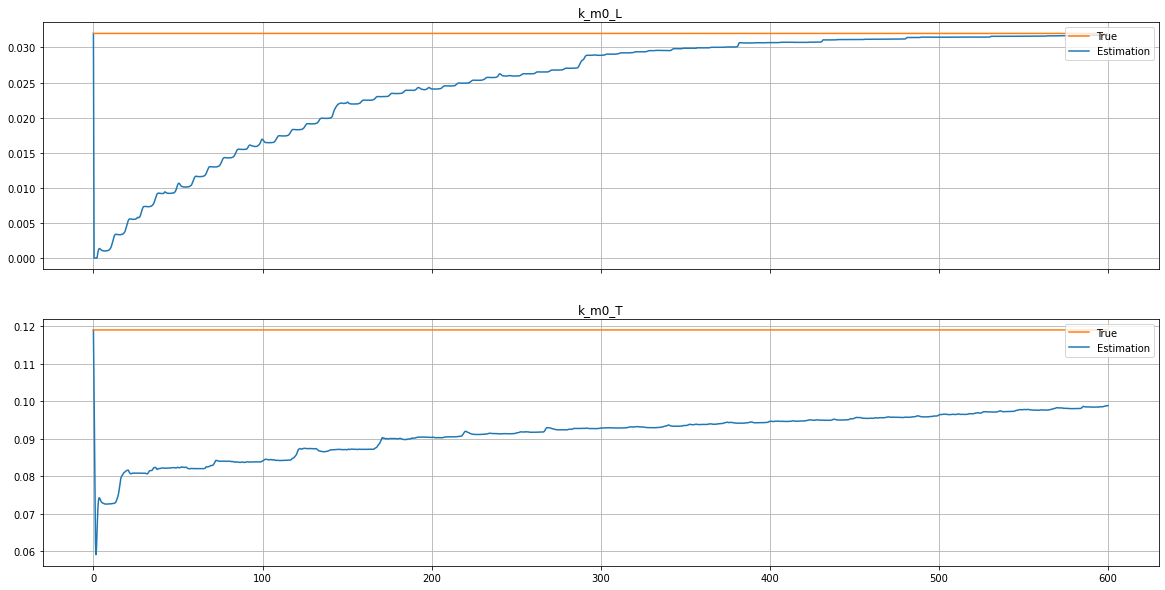

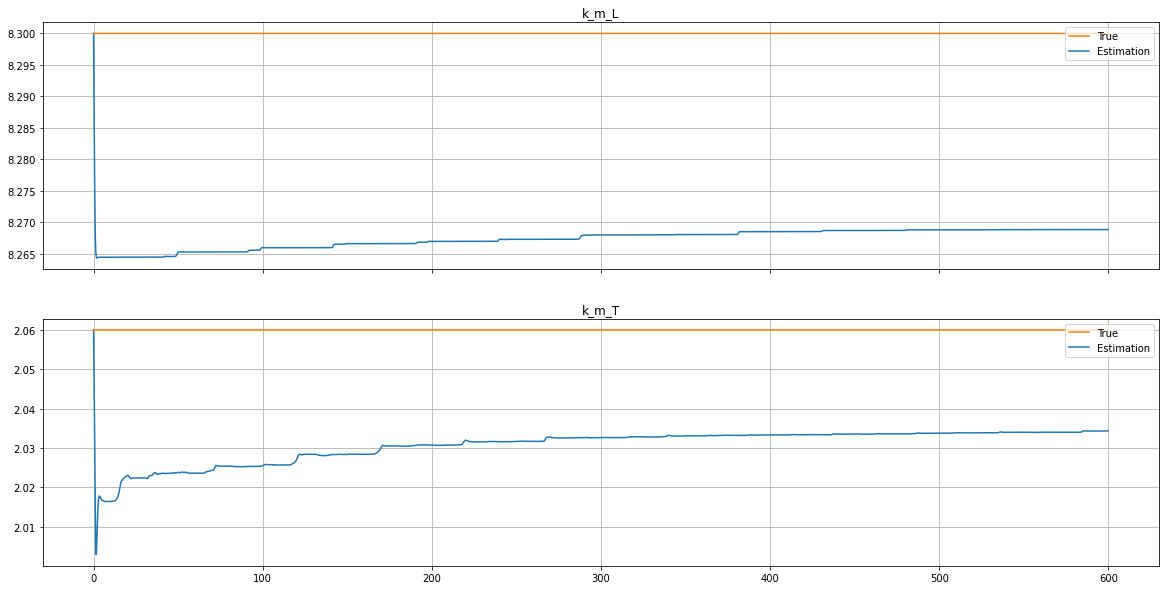

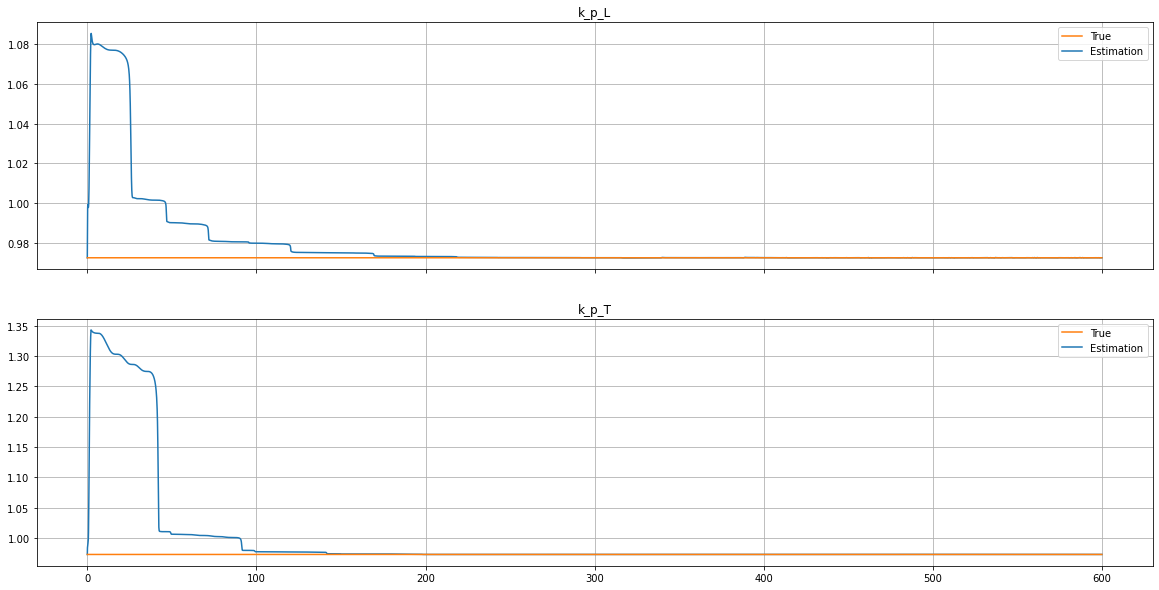

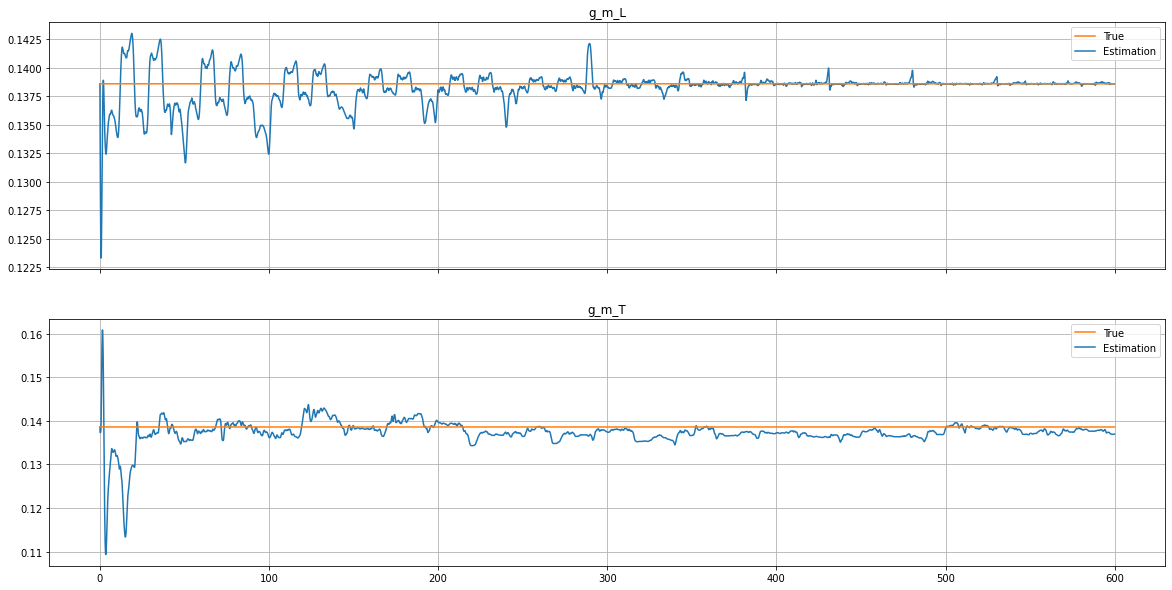

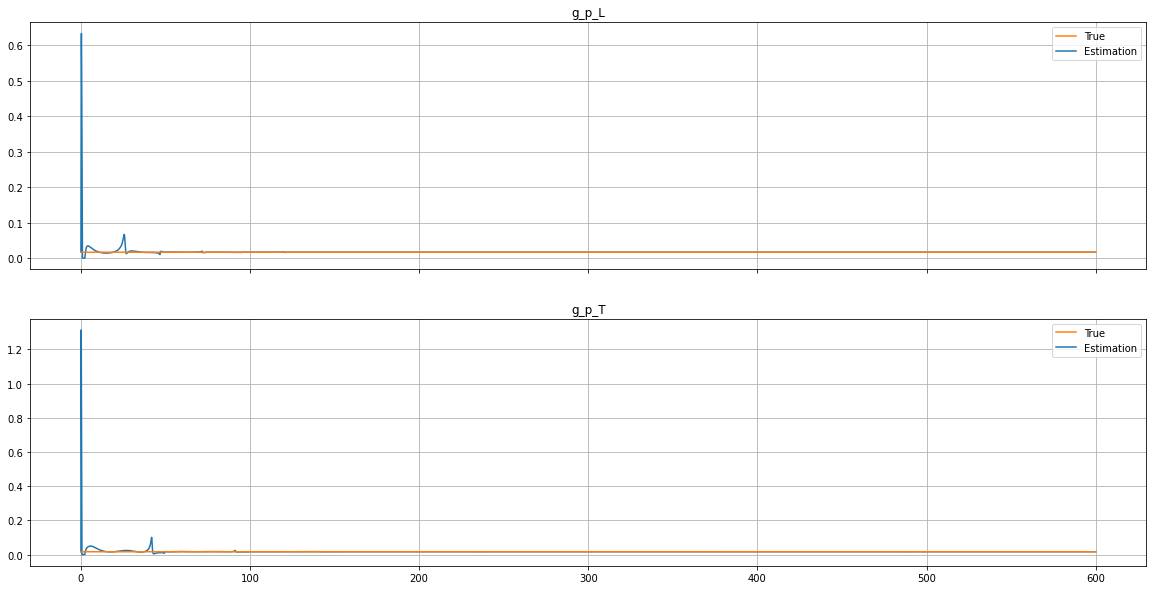

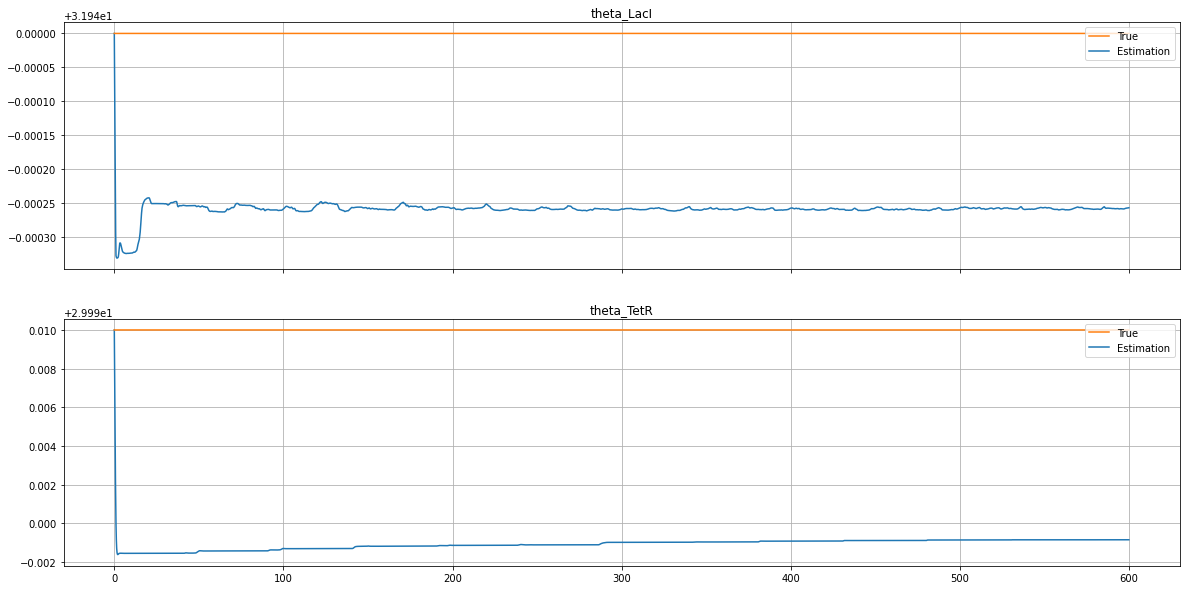

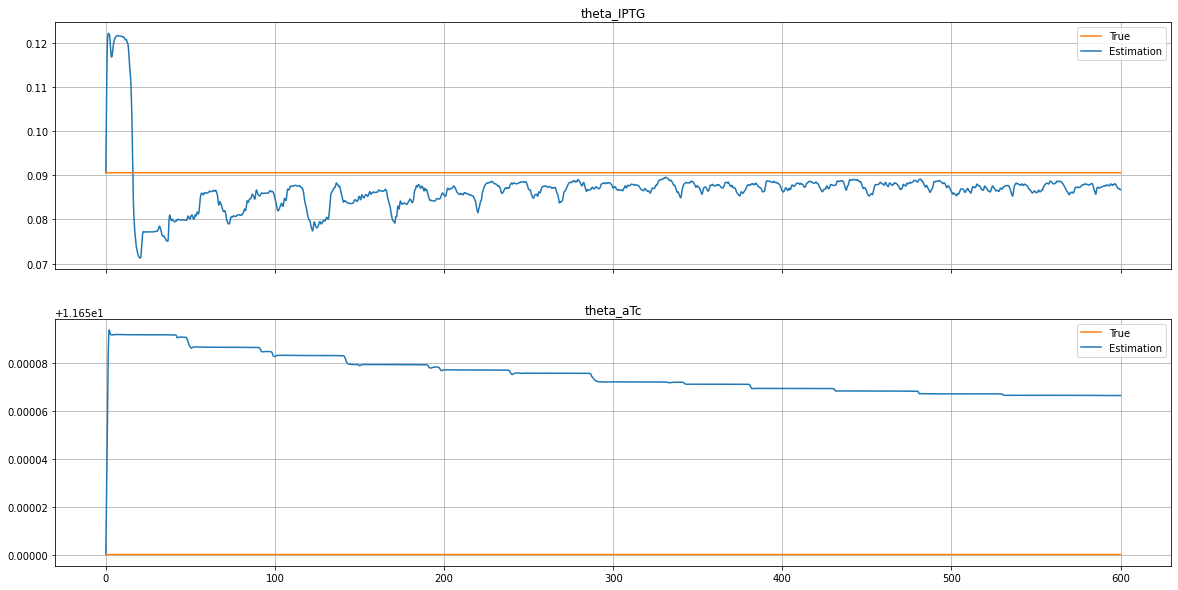

In [4]:
mhe_graphics = do_mpc.graphics.Graphics(mhe.data)
sim_graphics = do_mpc.graphics.Graphics(simulator.data)

fig_x = 20
fig_y = 10

plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14

xticks = [x for x in range(0, total_time + 1, 14400)]
xticks_label = [int(x/60) for x in range(0, total_time + 1, 14400)]

figure, axes = plt.subplots(2, sharex=True, figsize=(fig_x, fig_y))

mhe_graphics.add_line(var_type='_p', var_name='k_m0_L', axis=axes[0])
mhe_graphics.add_line(var_type='_p', var_name='k_m0_T', axis=axes[1])
sim_graphics.add_line(var_type='_p', var_name='k_m0_L', axis=axes[0])
sim_graphics.add_line(var_type='_p', var_name='k_m0_T', axis=axes[1])
axes[0].set_title('k_m0_L')
axes[1].set_title('k_m0_T')
axes[0].legend(sim_graphics.result_lines['_p', 'k_m0_L'] + mhe_graphics.result_lines['_p', 'k_m0_L'], ['True','Estimation'], loc = 'upper right')
axes[1].legend(sim_graphics.result_lines['_p', 'k_m0_T'] + mhe_graphics.result_lines['_p', 'k_m0_T'], ['True','Estimation'], loc = 'upper right')

figure, axes = plt.subplots(2, sharex=True, figsize=(fig_x, fig_y))
mhe_graphics.add_line(var_type='_p', var_name='k_m_L', axis=axes[0])
mhe_graphics.add_line(var_type='_p', var_name='k_m_T', axis=axes[1])
sim_graphics.add_line(var_type='_p', var_name='k_m_L', axis=axes[0])
sim_graphics.add_line(var_type='_p', var_name='k_m_T', axis=axes[1])
axes[0].set_title('k_m_L')
axes[1].set_title('k_m_T')
axes[0].legend(sim_graphics.result_lines['_p', 'k_m_L'] + mhe_graphics.result_lines['_p', 'k_m_L'], ['True','Estimation'], loc = 'upper right')
axes[1].legend(sim_graphics.result_lines['_p', 'k_m_T'] + mhe_graphics.result_lines['_p', 'k_m_T'], ['True','Estimation'], loc = 'upper right')

figure, axes = plt.subplots(2, sharex=True, figsize=(fig_x, fig_y))
mhe_graphics.add_line(var_type='_p', var_name='k_p_L', axis=axes[0])
mhe_graphics.add_line(var_type='_p', var_name='k_p_T', axis=axes[1])
sim_graphics.add_line(var_type='_p', var_name='k_p_L', axis=axes[0])
sim_graphics.add_line(var_type='_p', var_name='k_p_T', axis=axes[1])
axes[0].set_title('k_p_L')
axes[1].set_title('k_p_T')
axes[0].legend(sim_graphics.result_lines['_p', 'k_p_L'] + mhe_graphics.result_lines['_p', 'k_p_L'], ['True','Estimation'], loc = 'upper right')
axes[1].legend(sim_graphics.result_lines['_p', 'k_p_T'] + mhe_graphics.result_lines['_p', 'k_p_T'], ['True','Estimation'], loc = 'upper right')

figure, axes = plt.subplots(2, sharex=True, figsize=(fig_x, fig_y))
mhe_graphics.add_line(var_type='_p', var_name='g_m_L', axis=axes[0])
mhe_graphics.add_line(var_type='_p', var_name='g_m_T', axis=axes[1])
sim_graphics.add_line(var_type='_p', var_name='g_m_L', axis=axes[0])
sim_graphics.add_line(var_type='_p', var_name='g_m_T', axis=axes[1])
axes[0].set_title('g_m_L')
axes[1].set_title('g_m_T')
axes[0].legend(sim_graphics.result_lines['_p', 'g_m_L'] + mhe_graphics.result_lines['_p', 'g_m_L'], ['True','Estimation'], loc = 'upper right')
axes[1].legend(sim_graphics.result_lines['_p', 'g_m_T'] + mhe_graphics.result_lines['_p', 'g_m_T'], ['True','Estimation'], loc = 'upper right')

figure, axes = plt.subplots(2, sharex=True, figsize=(fig_x, fig_y))
mhe_graphics.add_line(var_type='_p', var_name='g_p_L', axis=axes[0])
mhe_graphics.add_line(var_type='_p', var_name='g_p_T', axis=axes[1])
sim_graphics.add_line(var_type='_p', var_name='g_p_L', axis=axes[0])
sim_graphics.add_line(var_type='_p', var_name='g_p_T', axis=axes[1])
axes[0].set_title('g_p_L')
axes[1].set_title('g_p_T')
axes[0].legend(sim_graphics.result_lines['_p', 'g_p_L'] + mhe_graphics.result_lines['_p', 'g_p_L'], ['True','Estimation'], loc = 'upper right')
axes[1].legend(sim_graphics.result_lines['_p', 'g_p_T'] + mhe_graphics.result_lines['_p', 'g_p_T'], ['True','Estimation'], loc = 'upper right')

figure, axes = plt.subplots(2, sharex=True, figsize=(fig_x, fig_y))
mhe_graphics.add_line(var_type='_p', var_name='theta_LacI', axis=axes[0])
mhe_graphics.add_line(var_type='_p', var_name='theta_TetR', axis=axes[1])
sim_graphics.add_line(var_type='_p', var_name='theta_LacI', axis=axes[0])
sim_graphics.add_line(var_type='_p', var_name='theta_TetR', axis=axes[1])
axes[0].set_title('theta_LacI')
axes[1].set_title('theta_TetR')
axes[0].legend(sim_graphics.result_lines['_p', 'theta_LacI'] + mhe_graphics.result_lines['_p', 'theta_LacI'], ['True','Estimation'], loc = 'upper right')
axes[1].legend(sim_graphics.result_lines['_p', 'theta_TetR'] + mhe_graphics.result_lines['_p', 'theta_TetR'], ['True','Estimation'], loc = 'upper right')

figure, axes = plt.subplots(2, sharex=True, figsize=(fig_x, fig_y))
mhe_graphics.add_line(var_type='_p', var_name='theta_IPTG', axis=axes[0])
mhe_graphics.add_line(var_type='_p', var_name='theta_aTc', axis=axes[1])
sim_graphics.add_line(var_type='_p', var_name='theta_IPTG', axis=axes[0])
sim_graphics.add_line(var_type='_p', var_name='theta_aTc', axis=axes[1])
axes[0].set_title('theta_IPTG')
axes[1].set_title('theta_aTc')
axes[0].legend(sim_graphics.result_lines['_p', 'theta_IPTG'] + mhe_graphics.result_lines['_p', 'theta_IPTG'], ['True','Estimation'], loc = 'upper right')
axes[1].legend(sim_graphics.result_lines['_p', 'theta_aTc'] + mhe_graphics.result_lines['_p', 'theta_aTc'], ['True','Estimation'], loc = 'upper right')

mhe_graphics.plot_results()
mhe_graphics.reset_axes()


In [5]:
from mpc.controller.mpc_controller import *
from mpc.utils.data_manipulation import * 

In [8]:
total_time = 86400  # Total simulation time 24h (86400s)
t_step = 60  # Read states every 1m (60s)
steps = int(total_time/t_step)  # Number of control step total_time/t_step 1440
avg_period = 14400  # Get average trajectory every 240 m (14400s)

x_0 = np.array([30, 50, 400, 125, 0, 0])

In [9]:

def template_model(stochasticity=False):

    model = do_mpc.model.Model(model_type='continuous')

    # Model states
    mRNA_LacI = model.set_variable(var_type='states', var_name='mRNA_LacI')
    mRNA_TetR = model.set_variable(var_type='states', var_name='mRNA_TetR')
    lacI = model.set_variable(var_type='states', var_name='LacI')
    tetR = model.set_variable(var_type='states', var_name='TetR')
    v1 = model.set_variable(var_type='states', var_name='v1')
    v2 = model.set_variable(var_type='states', var_name='v2')

    # Model inputs
    aTc = model.set_variable(var_type='inputs', var_name='aTc')
    iptg = model.set_variable(var_type='inputs', var_name='IPTG')

    # Model parameters
    k_m0_L = np.mean(mhe.data['_p', 'k_m0_L']) 
    k_m0_T = np.mean(mhe.data['_p', 'k_m0_T']) 
    k_m_L = np.mean(mhe.data['_p', 'k_m_L']) 
    k_m_T = np.mean(mhe.data['_p', 'k_m_T']) 
    k_p_L = np.mean(mhe.data['_p', 'k_p_L']) 
    k_p_T = np.mean(mhe.data['_p', 'k_p_T']) 
    g_m_L = np.mean(mhe.data['_p', 'g_m_L']) 
    g_m_T = np.mean(mhe.data['_p', 'g_m_T']) 
    g_p_L = np.mean(mhe.data['_p', 'g_p_L']) 
    g_p_T = np.mean(mhe.data['_p', 'g_p_T']) 
    theta_LacI = np.mean(mhe.data['_p', 'theta_LacI']) 
    theta_TetR = np.mean(mhe.data['_p', 'theta_TetR']) 
    theta_IPTG = np.mean(mhe.data['_p', 'theta_IPTG']) 
    theta_aTc = np.mean(mhe.data['_p', 'theta_aTc']) 
    eta_LacI = 2.00 
    eta_TetR = 2.00 
    eta_IPTG = 2.00 
    eta_aTc = 2.00
    k_in_aTc = 2.75e-2
    k_out_aTc = 2.00e-2
    k_in_IPTG = 1.62e-1
    k_out_IPTG = 1.11e-1    

    # Model references
    LacI_ref = 750
    TetR_ref = 300

    # Defining model's equations
    model.set_rhs('mRNA_LacI', k_m0_L + k_m_L*(1 / (1 + ((tetR/theta_TetR) * (1 /
                  (1 + (v1/theta_aTc)**eta_aTc)))**eta_TetR)) - g_m_L * mRNA_LacI, process_noise=stochasticity)
    model.set_rhs('mRNA_TetR', k_m0_T + k_m_T*(1 / (1 + ((lacI/theta_LacI) * (1 /
                  (1 + (v2/theta_IPTG)**eta_IPTG)))**eta_LacI)) - g_m_T * mRNA_TetR, process_noise=stochasticity)
    model.set_rhs('LacI', k_p_L * mRNA_LacI - g_p_L *
                  lacI, process_noise=stochasticity)
    model.set_rhs('TetR', k_p_T * mRNA_TetR - g_p_T *
                  tetR, process_noise=stochasticity)
    model.set_rhs('v1', (k_in_aTc * (aTc - v1)) * (aTc > v1) +
                  (k_out_aTc * (aTc - v1)) * (aTc <= v1), process_noise=stochasticity)
    model.set_rhs('v2', (k_in_IPTG * (iptg - v2)) * (iptg > v2) +
                  (k_out_IPTG * (iptg - v2)) * (iptg <= v2), process_noise=stochasticity)

    # The process noise w is used to simulate a disturbed system in the Simulator

    # Measurement noise
    if stochasticity:
        model.n_v = np.random.randn(6, 1)

    # Cost function
    model.set_expression(expr_name='cost', expr=(
        lacI - LacI_ref)**2 + (tetR - TetR_ref)**2)    

    model.setup()

    return model


In [10]:
%%capture

setup_mpc = {
    'n_robust': 1,
    'n_horizon': 10,
    't_step': t_step,
    'store_full_solution': True
}

model = template_model(False)
mpc = template_mpc(model, setup_mpc)
simulator = template_simulator(model, t_step)
estimator = do_mpc.estimator.StateFeedback(model)

simulator.reset_history()

mpc.x0 = x_0
simulator.x0 = x_0
estimator.x0 = x_0

mpc.set_initial_guess()

for k in range(steps):

    u = mpc.make_step(x_0)
    if (mpc.t0 - t_step) % 900 == 0:
        y_next = simulator.make_step(u)
        x_0 = estimator.make_step(y_next)

data = save_results(mpc, avg_period, t_step)


------------------------------ PERFORMANCES METRICS ------------------------------
ISE: 5.61e-02
ITAE: 1.54e+04
------------------------------ PLOT RESULTS ------------------------------


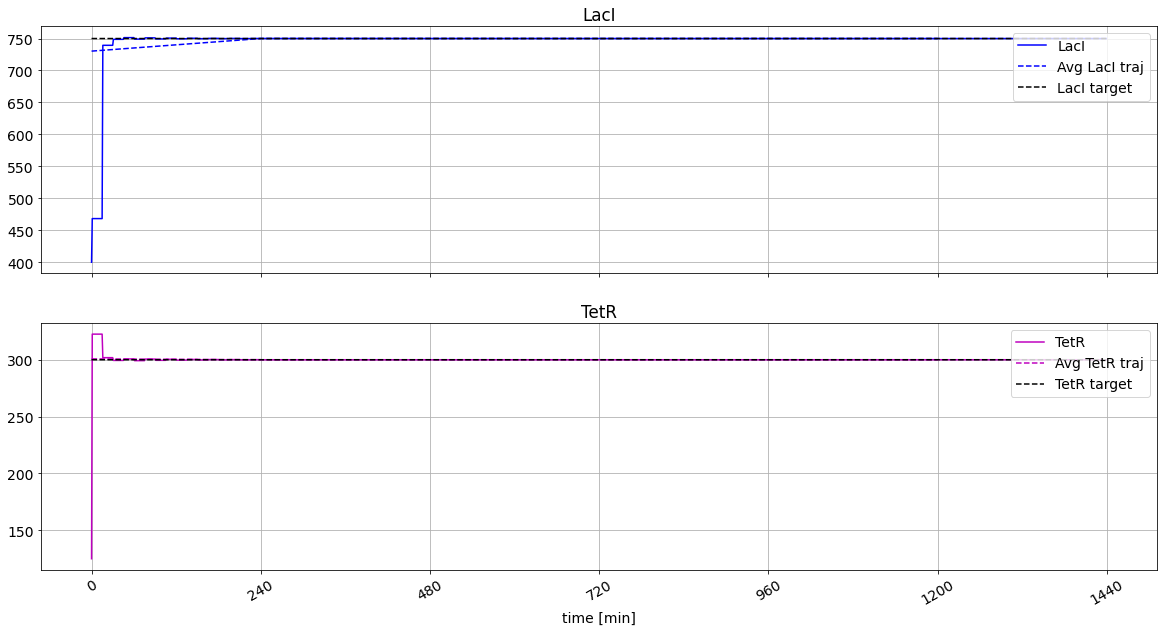

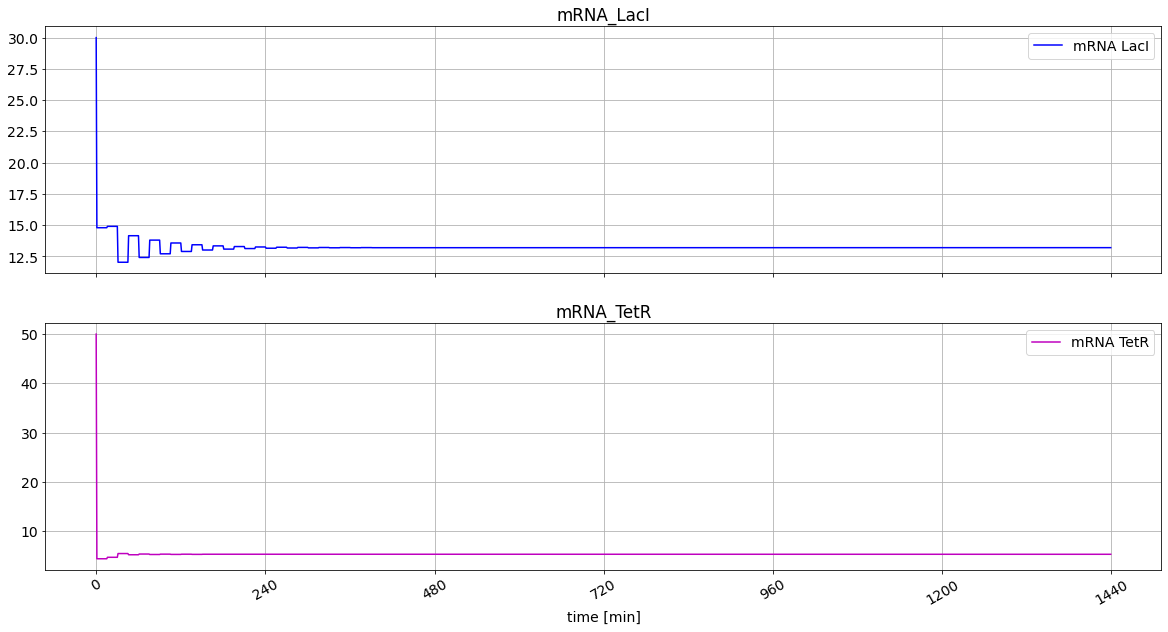

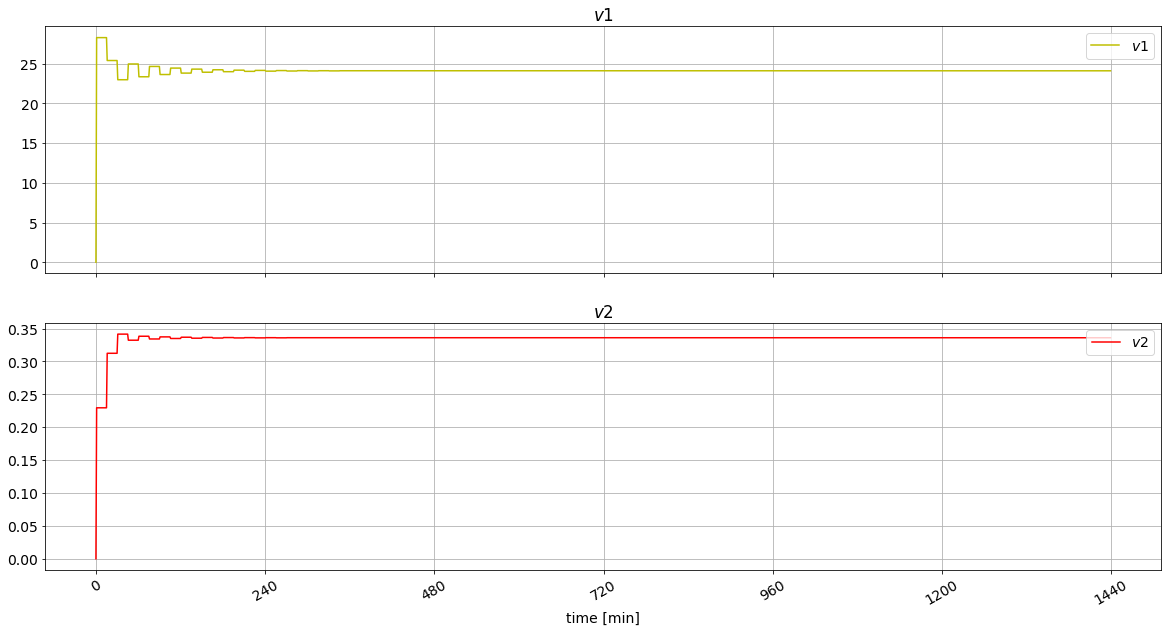

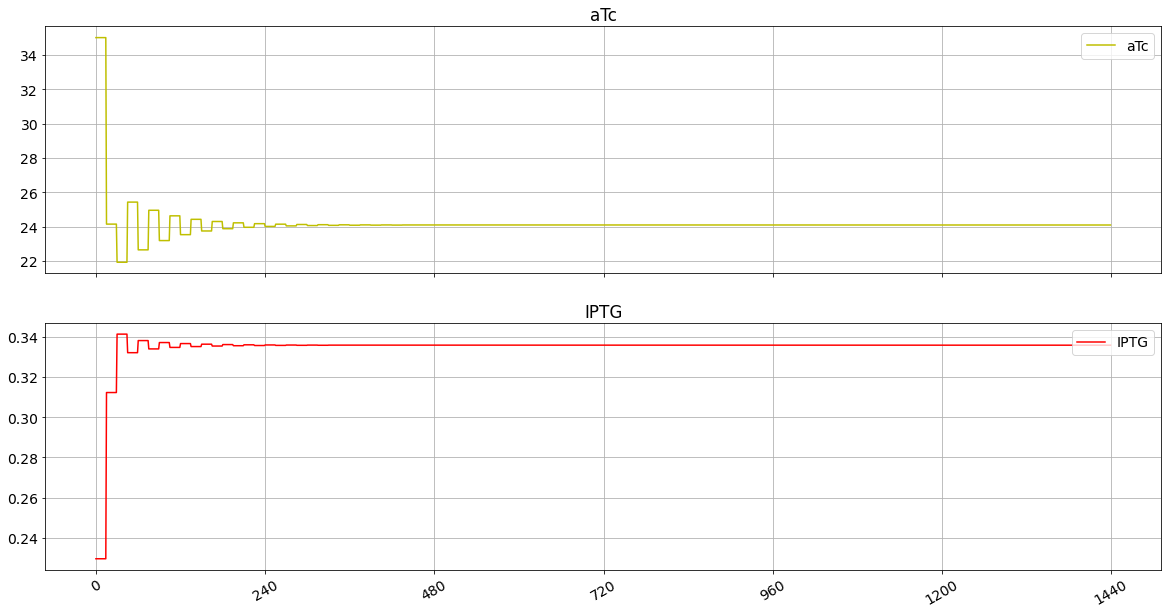

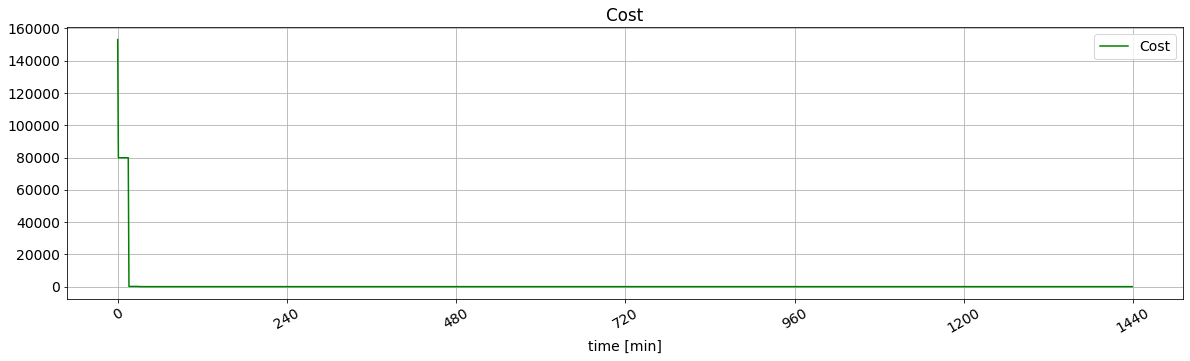

In [11]:
print('------------------------------ PERFORMANCES METRICS ------------------------------')
ISE, ITAE = compute_performance_metrics(data, total_time, t_step, avg_period)
print('ISE:', format(ISE, '.2e'))
print('ITAE:', format(ITAE, '.2e'))

print('------------------------------ PLOT RESULTS ------------------------------')
figures, lines = plot_results(data, total_time, avg_period)